# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

   # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()

        # Check if the response contains the necessary data
        if response["cod"] != 200:
            print(f"City {city} not found. Skipping...")
            continue

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cabedelo
Processing Record 2 of Set 1 | stanley
Processing Record 3 of Set 1 | el granada
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | hobyo
Processing Record 6 of Set 1 | chipinge
Processing Record 7 of Set 1 | alofi
Processing Record 8 of Set 1 | nova sintra
Processing Record 9 of Set 1 | totness
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | olonkinbyen
Processing Record 13 of Set 1 | usinsk
Processing Record 14 of Set 1 | nicoya
Processing Record 15 of Set 1 | vila velha
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | iskateley
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | aasiaat
Processing Record 20 of Set 1 | karratha
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | wynyard
Processing Record 23 of Set 1 | is

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cabedelo,-6.9811,-34.8339,22.37,77,100,4.84,BR,1730270761
1,stanley,54.8680,-1.6985,8.01,95,20,1.54,GB,1730270751
2,el granada,37.5027,-122.4694,12.14,81,40,4.63,US,1730270869
3,waitangi,-43.9535,-176.5597,12.68,93,100,0.89,NZ,1730270636
4,hobyo,5.3505,48.5268,28.01,76,94,3.13,SO,1730270754


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cabedelo,-6.9811,-34.8339,22.37,77,100,4.84,BR,1730270761
1,stanley,54.8680,-1.6985,8.01,95,20,1.54,GB,1730270751
2,el granada,37.5027,-122.4694,12.14,81,40,4.63,US,1730270869
3,waitangi,-43.9535,-176.5597,12.68,93,100,0.89,NZ,1730270636
4,hobyo,5.3505,48.5268,28.01,76,94,3.13,SO,1730270754


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

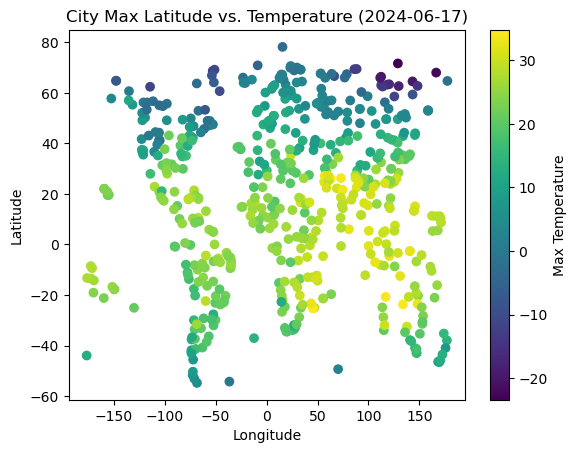

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lng'],city_data_df['Lat'],c=city_data_df['Max Temp'])
clb = plt.colorbar()
# Incorporate the other graph properties
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
clb.set_label("Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

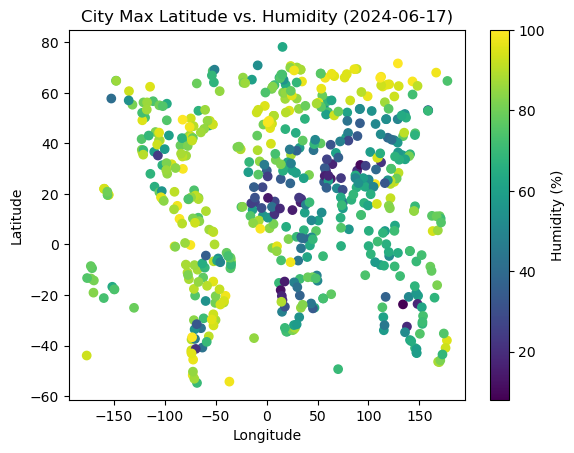

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lng'],city_data_df['Lat'],c=city_data_df['Humidity'])
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("City Max Latitude vs. Humidity (2024-06-17)")
clb.set_label("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

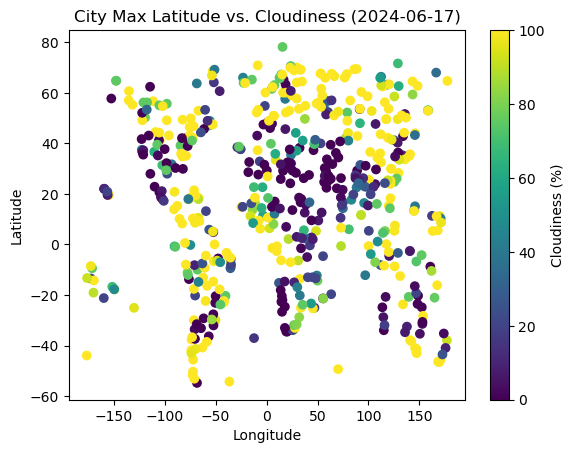

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lng'],city_data_df['Lat'],c=city_data_df['Cloudiness'])
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("City Max Latitude vs. Cloudiness (2024-06-17)")
clb.set_label("Cloudiness (%)")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

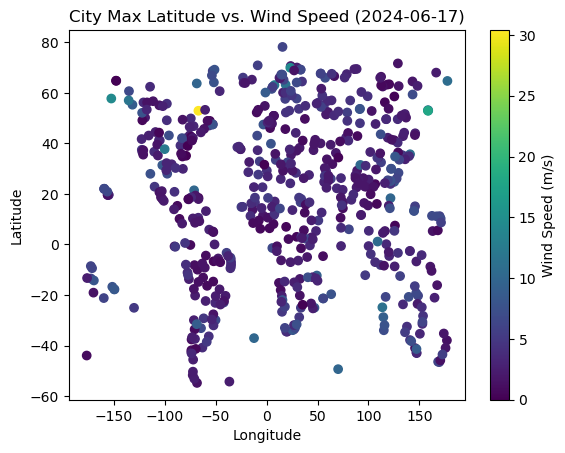

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lng'],city_data_df['Lat'],c=city_data_df['Wind Speed'])
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("City Max Latitude vs. Wind Speed (2024-06-17)")
clb.set_label("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def plot_lin_regression(x, y, xlabel, ylabel, title, hemisphere, save_fig=False):
    # Linear regression variables
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    
    # Regression line calculation
    regress_values = x * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {rvalue**2:.2f}"
    
    # Create scatter plot
    plt.scatter(x, y)
    plt.plot(x, regress_values, "r-", label="Regression Line")
    
    # Annotate the plot with regression equation and R² value
    plt.annotate(line_eq, (min(x), min(y)), fontsize=12, color="red", ha="left", va="bottom")
    
    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{hemisphere} Hemisphere: {title}")
    
    # Display legend
    plt.legend()
    
    # Save the figure if specified
    if save_fig:
        plt.savefig(f"output_data/{title.replace(' ', '_')}_LinearRegression.png")
    
    # Show plot
    plt.show()
    
    print(f'The r^2-value is: {rvalue**2:.4f}')

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,stanley,54.8680,-1.6985,8.01,95,20,1.54,GB,1730270751
2,el granada,37.5027,-122.4694,12.14,81,40,4.63,US,1730270869
4,hobyo,5.3505,48.5268,28.01,76,94,3.13,SO,1730270754
7,nova sintra,14.8667,-24.7167,25.64,74,100,5.81,CV,1730270876
8,totness,5.8833,-56.3167,25.62,87,26,2.92,SR,1730270877


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cabedelo,-6.9811,-34.8339,22.37,77,100,4.84,BR,1730270761
3,waitangi,-43.9535,-176.5597,12.68,93,100,0.89,NZ,1730270636
5,chipinge,-20.1883,32.6236,29.79,37,41,1.51,ZW,1730270873
6,alofi,-19.0595,-169.9187,23.94,83,90,1.54,NU,1730270874
9,lebu,-37.6167,-73.6500,12.73,90,100,1.15,CL,1730270672


###  Temperature vs. Latitude Linear Regression Plot

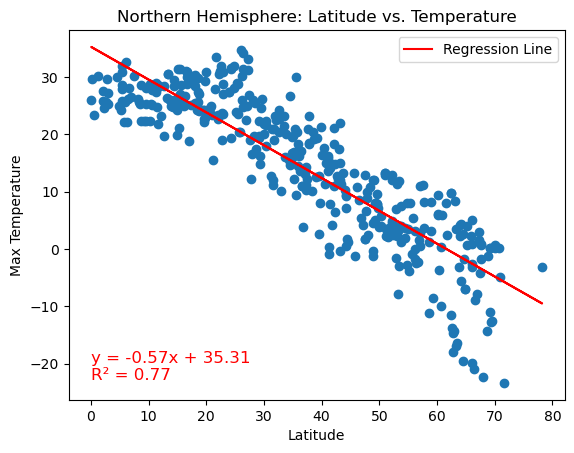

The r^2-value is: 0.7728


In [20]:
# Linear regression on Northern Hemisphere
plot_lin_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], "Latitude", "Max Temperature", "Latitude vs. Temperature", "Northern", save_fig=True)


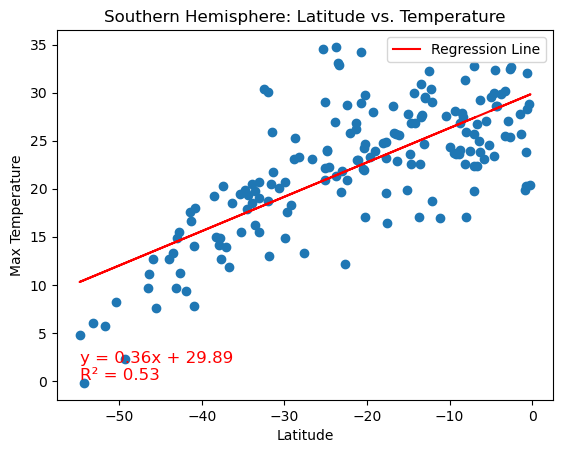

The r^2-value is: 0.5343


In [21]:
# Linear regression on Southern Hemisphere
plot_lin_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], "Latitude", "Max Temperature", "Latitude vs. Temperature", "Southern", save_fig=True)


**Discussion about the linear relationship:** 
for the Northen Hemisphere is a very noticeable correlation between latitude and temperature, the grater the lat the lower the temperature 

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.007659599322853922


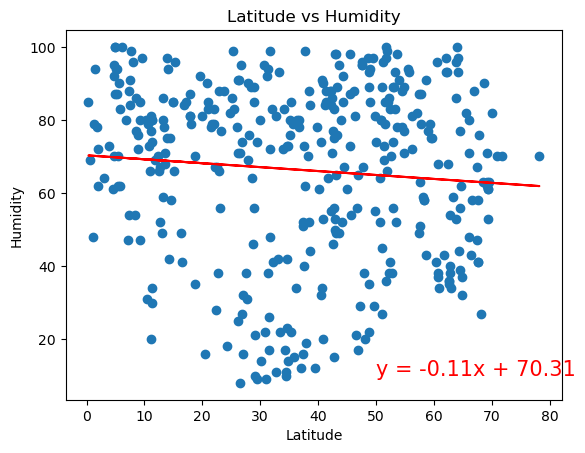

In [17]:
# Northern Hemisphere
plot_lin_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], "Latitude", "Humidity (%)", "Latitude vs. Humidity", "Northern", save_fig=True)

The r^2-value is: 0.00014367159540169783


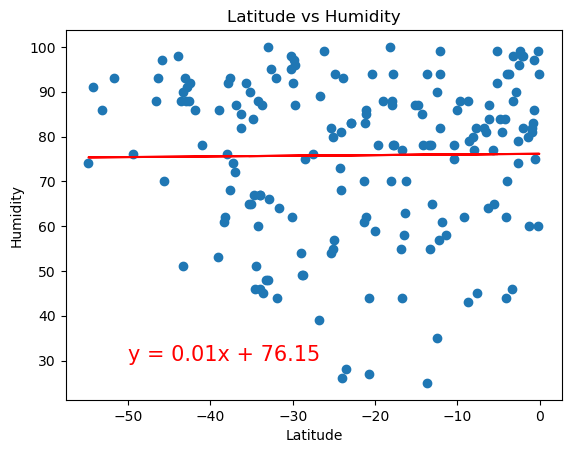

In [23]:
# Southern Hemisphere
plot_lin_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], "Latitude", "Humidity (%)", "Latitude vs. Humidity", "Southern", save_fig=True)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


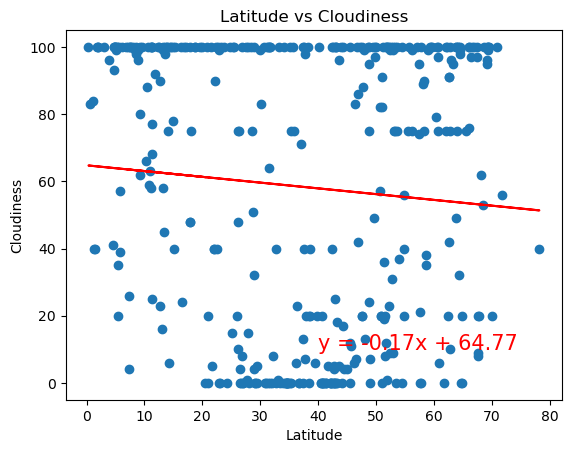

In [19]:
# Northern Hemisphere
plot_lin_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], "Latitude", "Cloudiness (%)", "Latitude vs. Cloudiness", "Northern", save_fig=True)


The r^2-value is: 0.018616831531634456


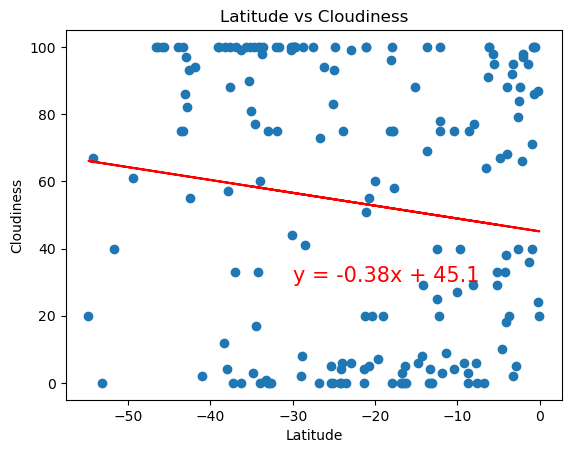

In [20]:
# Southern Hemisphere
plot_lin_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Latitude", "Cloudiness (%)", "Latitude vs. Cloudiness", "Southern", save_fig=True)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


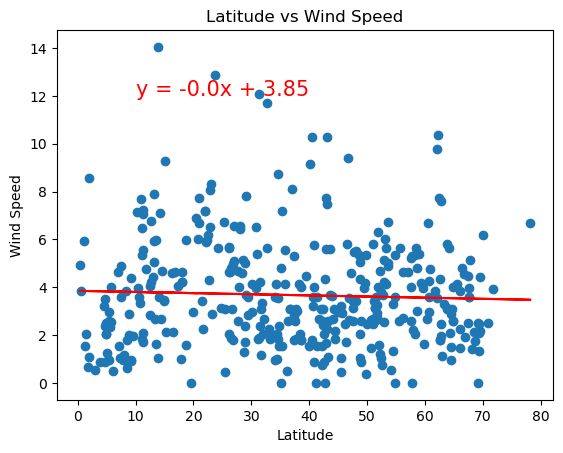

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.06495869418886388


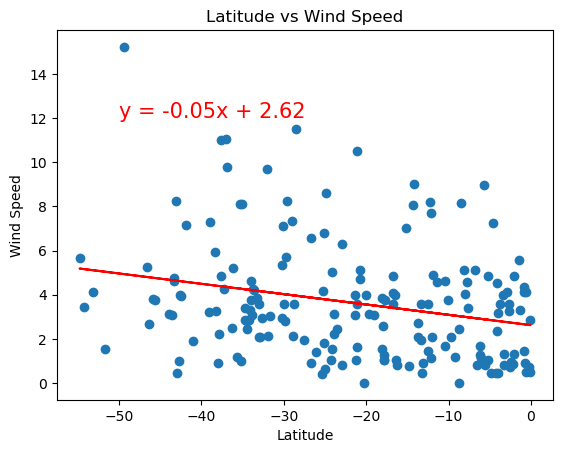

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE